In [133]:
import pandas as pd #Preprocess Titanic data
import matplotlib.pyplot as plot
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.preprocessing import *

In [150]:
trainData = pd.read_csv("/kaggle/input/train-and-test-dataset/train.csv")
trainData.head()
trainData.dropna(subset = ["Age"], inplace = True)
trainData["Fare"].fillna(trainData["Fare"].mean(), inplace = True)
trainData = pd.get_dummies(trainData, columns = ["Sex", "Pclass", "Cabin"], drop_first = True)
trainData.drop(["Name", "Ticket", "Embarked"], axis = 1, inplace = True)


In [151]:
scaler = StandardScaler()
trainData[["Age", "Fare"]] = scaler.fit_transform(trainData[["Age", "Fare"]])
X = trainData.drop("Survived", axis = 1)
Y = trainData["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 2, random_state = 30)


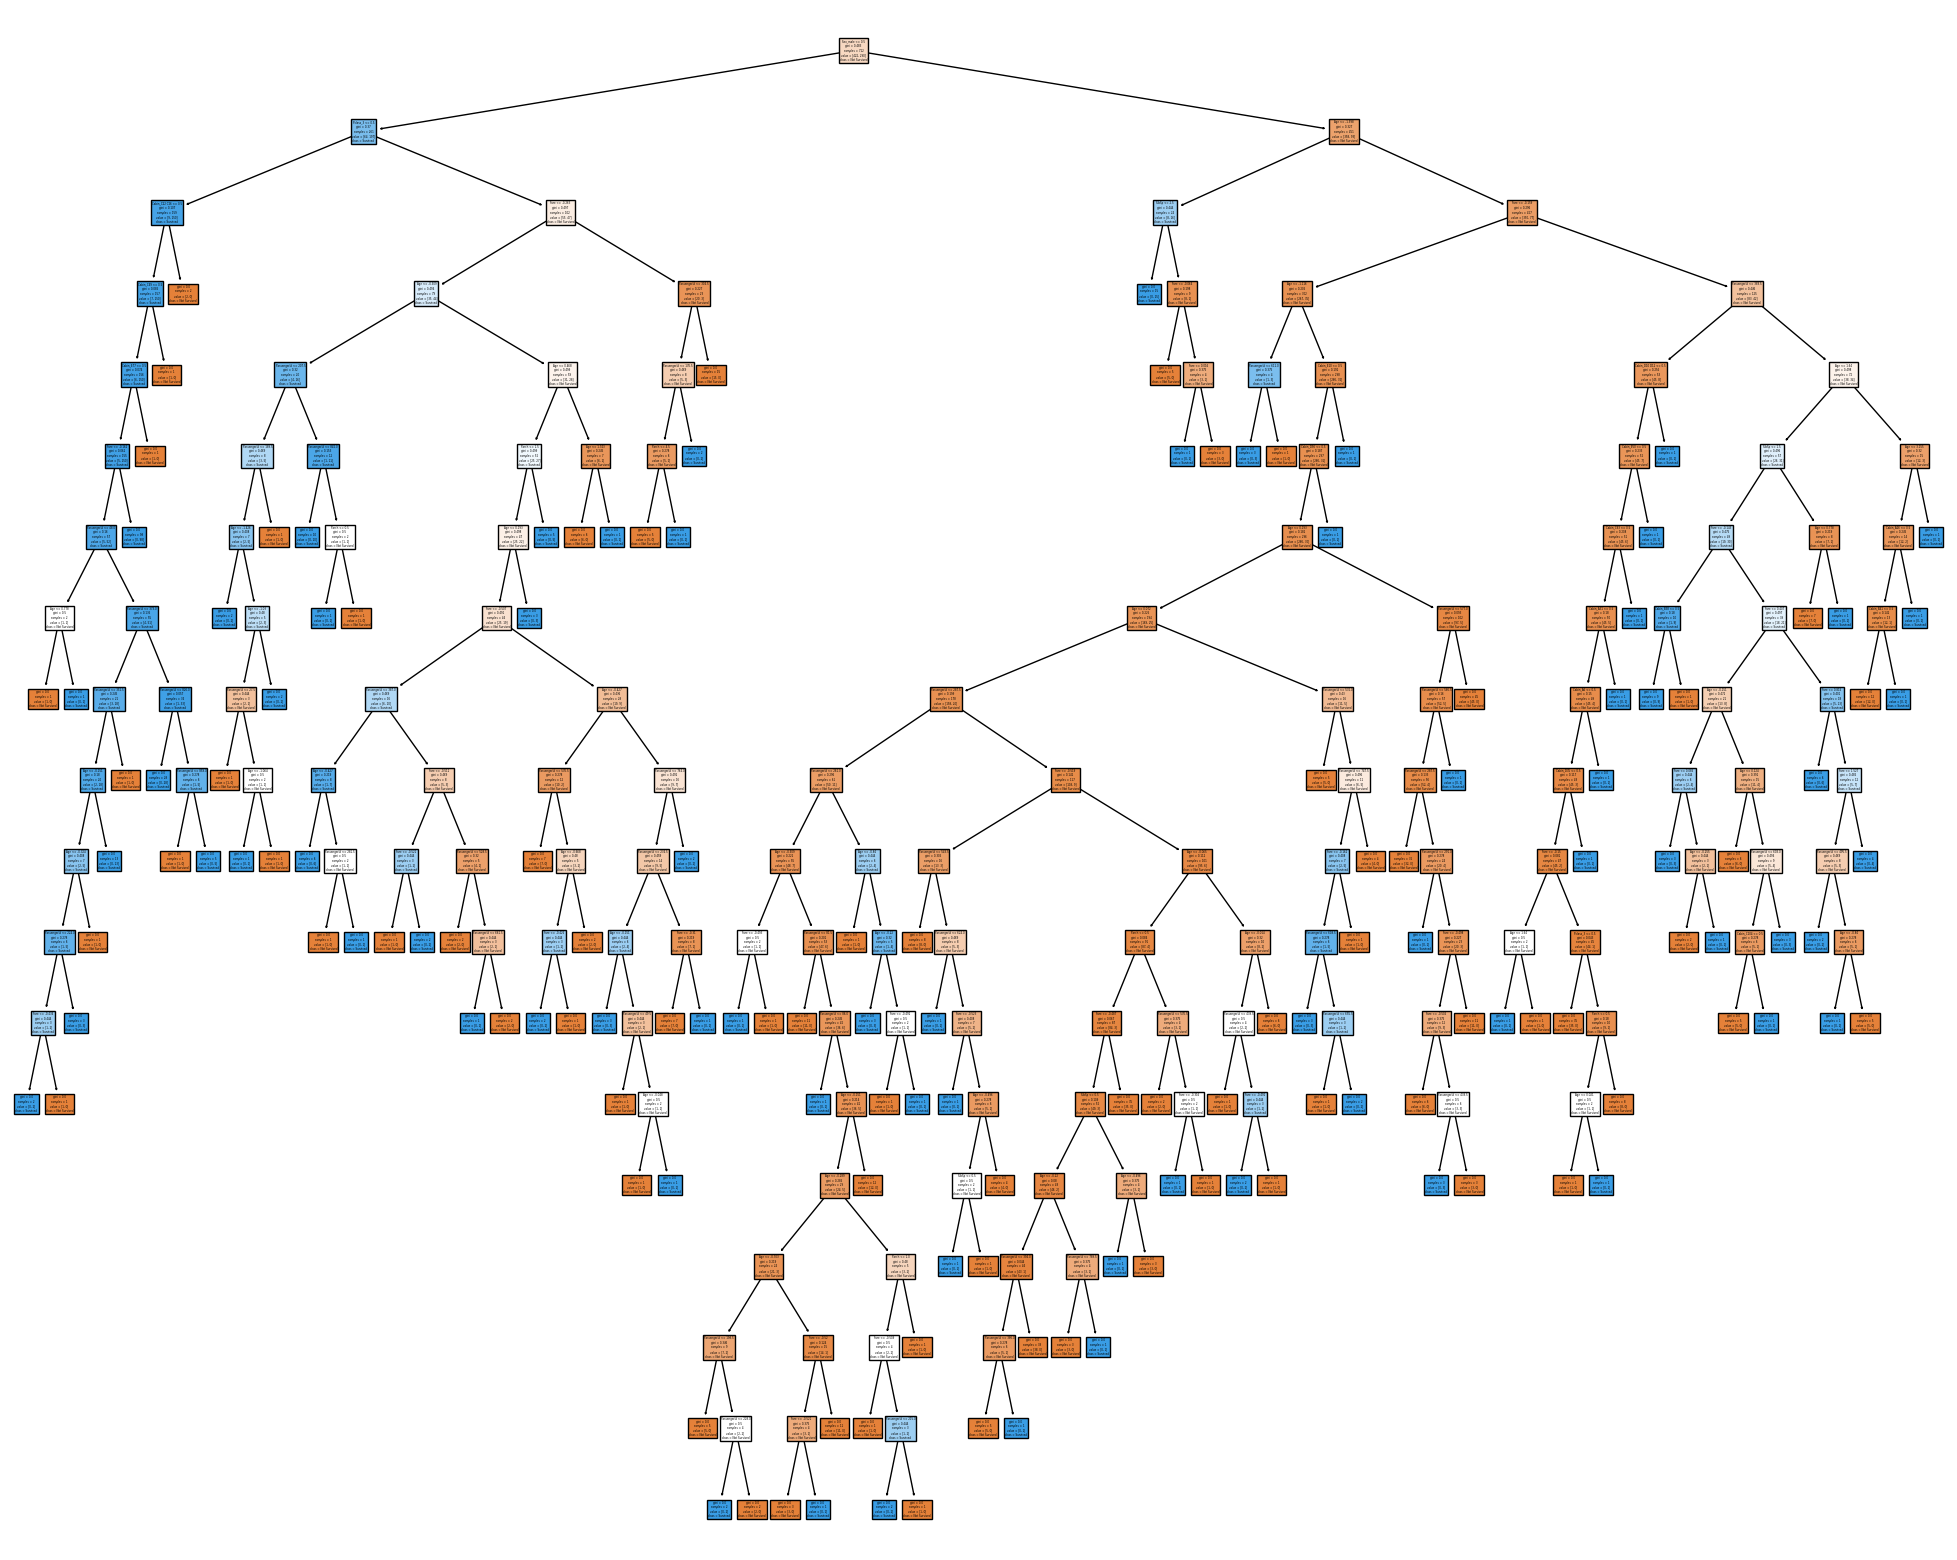

In [156]:
#Plotting Decision Tree
tree = DecisionTreeClassifier(random_state = 30)
tree.fit(X_train, Y_train)
plot.figure(figsize = (25, 20))
plot_tree(tree, filled = True, feature_names = X.columns, class_names = ["Not Survived", "Survived"])
plot.show(block = False)

In [157]:
#Five fold cross validation of decision tree model to extract average classification accuracy
crossValScoreDT = cross_val_score(tree, X, Y, cv = 5, scoring = 'accuracy')
decisionTreeClassAcc = crossValScoreDT.mean()
print(decisionTreeClassAcc)

0.7185659411011524


In [158]:
#Five fold cross validation of random forest model to extract average classification accuracy
classification = RandomForestClassifier(random_state = 30)
crossValScoreRF = cross_val_score(classification, X, Y, cv = 5, scoring = 'accuracy')
randForestClassAcc = crossValScoreRF.mean()
print(randForestClassAcc)

0.792790308283266
